In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray, ArrayLike
from sc.bcs import gap_function, diff_fd, extend_energy_axis, conv_gap
from scipy.optimize import minimize

In [4]:
exp_data = np.loadtxt("./20220922bs_00005.dat", skiprows=90).T
energy_axis = exp_data[0]
lockin_value = exp_data[2]

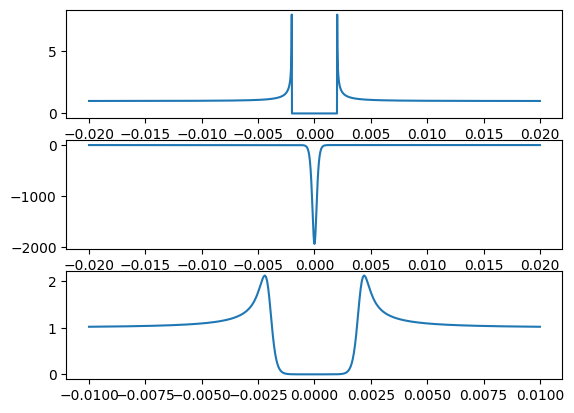

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(extend_energy_axis(energy_axis),
         gap_function(extend_energy_axis(energy_axis), 0.002, 1, 0))
ax2 = fig.add_subplot(312)
ax2.plot(extend_energy_axis(energy_axis),
         diff_fd(extend_energy_axis(energy_axis), 1.5))
ax3 = fig.add_subplot(313)
ax3.plot(energy_axis, conv_gap(energy_axis,
         extend_energy_axis(energy_axis), 0.002, 1, 1.5 ))

In [6]:
def rmse_res(param: tuple[float, float, float, float],
             bias_voltage: NDArray[np.float_],
             lockin_output: NDArray[np.float_]):
    """_summary_

    Parameters
    ----------
    param : tuple[float, float, float]
        param[0]: delta (eV)
        param[1]: N_0
        param[2]: Temperature
        param[3]: offset_x
    bias_voltage : ArrayLike
        _description_
    lockin_output : ArrayLike
        _description_
    """
    residual = lockin_output - conv_gap(bias_voltage, extend_energy_axis(energy_axis), param[0], param[1], param[2], param[3])
    return  np.sqrt(np.sum(residual**2) / len(bias_voltage))

In [7]:
minimize(rmse_res, (0.003, 5e-12, 4.7, 0), args=(energy_axis, lockin_value), method="Nelder-Mead")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 6.72583352031967e-13
             x: [ 1.457e-03  4.717e-12  5.442e+00  8.763e-05]
           nit: 208
          nfev: 368
 final_simplex: (array([[ 1.457e-03,  4.717e-12,  5.442e+00,  8.763e-05],
                       [ 1.457e-03,  4.717e-12,  5.442e+00,  8.763e-05],
                       ...,
                       [ 1.457e-03,  4.717e-12,  5.442e+00,  8.763e-05],
                       [ 1.457e-03,  4.717e-12,  5.442e+00,  8.763e-05]]), array([ 6.726e-13,  6.726e-13,  6.726e-13,  6.726e-13,
                        6.726e-13]))

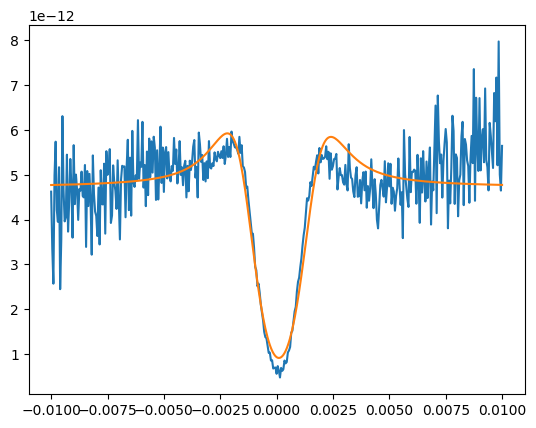

In [8]:
plt.plot(energy_axis, lockin_value)
plt.plot(energy_axis, conv_gap(energy_axis, extend_energy_axis(energy_axis), 0.001457, 4.717e-12, 5.442, 8.763E-5 ))